# Potts model complexity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from potts_complexity import *

### Model parameters

In [ ]:
Q = 5
Tc = 1/np.log(1+np.sqrt(Q))
print(f"Potts 2D model (25x25 lattice) Q={Q:d}, Tc={Tc:.2f}")
# relative temperatures
rtemps = [0.2, 0.4, 0.6, 0.8, 0.9, 1.0, 1.1, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
n_temps = len(rtemps)

### DFA parameters

In [ ]:
p_dfa = {'lmin': 50, 'lmax': 2500, 'fitmin': 50, 'fitmax': 2500, 'nsteps': 50, 'doplot': False}

### Entropy rate / excess entropy history length

In [ ]:
k_hist = 6 # samples

### Compute entropy rate, excess entropy, LZC, and Hurst exponents

In [2]:
# result arrays
n_samples = 10
er_arr = np.zeros((n_temps,n_samples))
ee_arr = np.zeros((n_temps,n_samples))
lzc_arr = np.zeros((n_temps,n_samples))
h_arr = np.zeros((n_temps,n_samples))
for i, rtemp in enumerate(rtemps):
    f_in = f"./data/PottsQ5_Temp_{rtemp*Tc:.2f}_Lattice_L25_fm.npy"
    x = np.load(f_in).astype(np.uint8)
    for j in range(n_samples):
        print(f"\nrel. temp: {rtemp:.1f}, temp.: {rtemp*Tc:.2f}, sample {j+1:d}/{n_samples:d}", end="\r")
        er, ee = excess_entropy_rate(x[:,j], Q, k_hist, doplot=False)
        er_arr[i,j] = er
        ee_arr[i,j] = ee
        lzc_arr[i,j] = lz76(x[:,j])
        h_arr[i,j] = dfa(x[:,j], **p_dfa)
print("\ndone.")

Q=5, Tc=0.85

rel. temp: 0.2, temp.: 0.17
sample 10/10

rel. temp: 0.4, temp.: 0.34
sample 10/10

rel. temp: 0.6, temp.: 0.51
sample 10/10

rel. temp: 0.8, temp.: 0.68
sample 10/10

rel. temp: 0.9, temp.: 0.77
sample 10/10

rel. temp: 1.0, temp.: 0.85
sample 10/10

rel. temp: 1.1, temp.: 0.94
sample 10/10

rel. temp: 1.2, temp.: 1.02
sample 10/10

rel. temp: 1.4, temp.: 1.19
sample 10/10

rel. temp: 1.6, temp.: 1.36
sample 10/10

rel. temp: 1.8, temp.: 1.53
sample 10/10

rel. temp: 2.0, temp.: 1.70
sample 10/10

rel. temp: 2.2, temp.: 1.87
sample 10/10

rel. temp: 2.4, temp.: 2.04
sample 10/10

rel. temp: 2.6, temp.: 2.21
sample 10/10

rel. temp: 2.8, temp.: 2.38
sample 10/10

rel. temp: 3.0, temp.: 2.55
sample 10/10


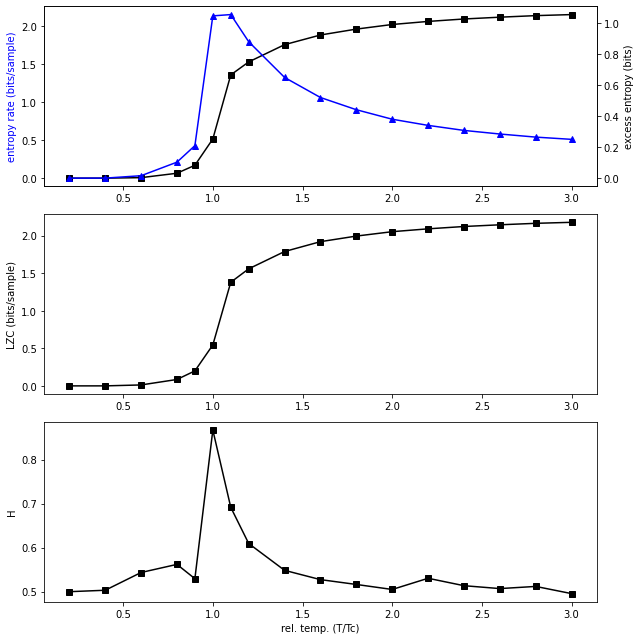

In [3]:
# Figure
ms_ = 12
fs_ = 16
fig, ax = plt.subplots(3, 1, figsize=(9,9))
# entropy rate
ax[0].plot(rtemps, er_arr.mean(axis=1), '-sk')
ax[0].set_ylabel(f"entropy rate (bits/sample)", color="b")
# excess entropy
ax0c = ax[0].twinx()
ax0c.set_ylabel(f"excess entropy (bits)")
ax0c.plot(rtemps, ee_arr.mean(axis=1), '-^b')
# LZC
ax[1].plot(rtemps, lzc_arr.mean(axis=1), '-sk')
ax[1].set_ylabel(f"LZC (bits/sample)")
# Hurst exponent
ax[2].plot(rtemps, h_arr.mean(axis=1), '-sk')
ax[2].set_ylabel(f"H")
ax[2].set_xlabel(f"rel. temp. (T/Tc)")
plt.tight_layout()
plt.show()